In [1]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%store -r
X_train = pd.read_pickle('./data/X_train_pickle.pkl')
X_test = pd.read_pickle('./data/X_test_pickle.pkl')
y_train = pd.read_pickle('./data/y_train_pickle.pkl')
y_test = pd.read_pickle('./data/y_test_pickle.pkl')

In [2]:
comparison_dictionary = {
    'accuracy':{
        'KNN': knn['accuracy'],
        'LR': lr['accuracy'],
        'RF': rf['accuracy'],
        'SVM': svm['accuracy'],
    },
    'f1':{
        'KNN': knn['f1'],
        'LR': lr['f1'],
        'RF': rf['f1'],
        'SVM': svm['f1'],
    }
}

# compares accuracy between models
high_accuracy = 0
best_model = None
for model, accuracy in comparison_dictionary['accuracy'].items():
    if accuracy > high_accuracy:
        high_accuracy = accuracy
        best_model = model
print("The best accuracy score that we compared was {} and was a result of the {} model".format(high_accuracy, best_model))    

# compares f1 between models
high_f1 = 0
best_model = None
for model, f1 in comparison_dictionary['f1'].items():
    if f1 > high_f1:
        high_f1 = f1
        best_model = model
print("The best f1 score that we compared was {} and was a result from the {} model".format(high_f1, best_model))    

The best accuracy score that we compared was 85.31 and was a result of the RF model
The best f1 score that we compared was 67.8 and was a result from the RF model


In [3]:
finished_models = [knn_grid_search, rf_grid_search, lr_grid_search, svm_grid_search]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for model in finished_models:
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    print('AUC = {}'.format(auc))
    result_table = result_table.append({'classifiers':model.best_estimator_.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc
                                       }, ignore_index=True)

# Set name of the classifiers as index labels
result_table = result_table.set_index('classifiers')

AUC = 0.8637915111985095
AUC = 0.9063045489142441
AUC = 0.899003473122617
AUC = 0.8926398583138848


KNeighborsClassifier
RandomForestClassifier
LogisticRegression
SVC


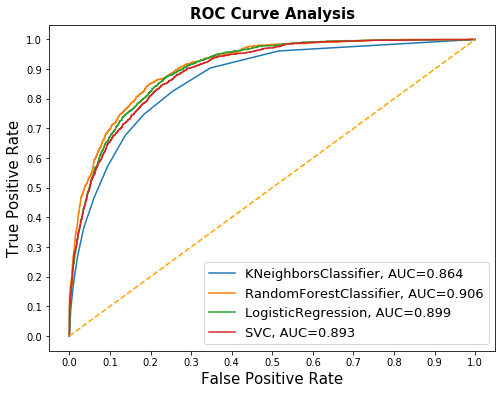

In [4]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    print(i)
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(str(i), result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Resource for plotting ROC curve
>https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot